# *`IMPORT LIBRARIES`*

In [ ]:
import pandas as pd
import numpy as np

#statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio 
pio.renderers.default="vscode" # for plotly plots 
import matplotlib.pyplot as plt
import seaborn as sns


#Machine Learning
from sklearn.model_selection import train_test_split
import imblearn
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score



In [2]:
df= pd.read_csv("creditcardcsv.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
''' 
supervised learning


Dependent Variable: Class
Independent Variables: Time, Amount

continuous: Time, Amount, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28
Categorical: Class
'''

' \nsupervised learning\n\n\nDependent Variable: Class\nIndependent Variables: Time, Amount\n\ncontinuous: Time, Amount, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28\nCategorical: Class\n'

In [6]:
df.Class.unique()

array([0, 1], dtype=int64)

In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df.isnull().sum()
#no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated().sum()

1081

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [12]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,...,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,...,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,...,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


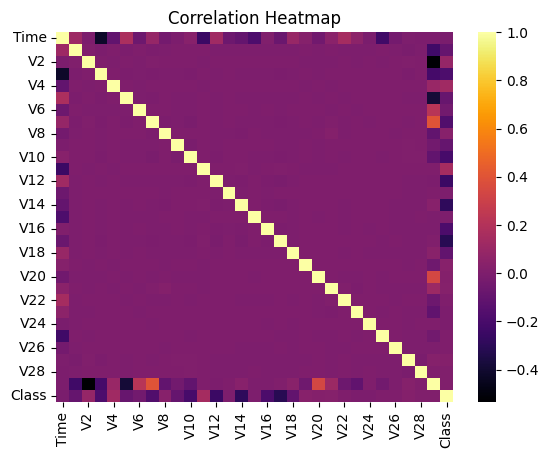

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()
     

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

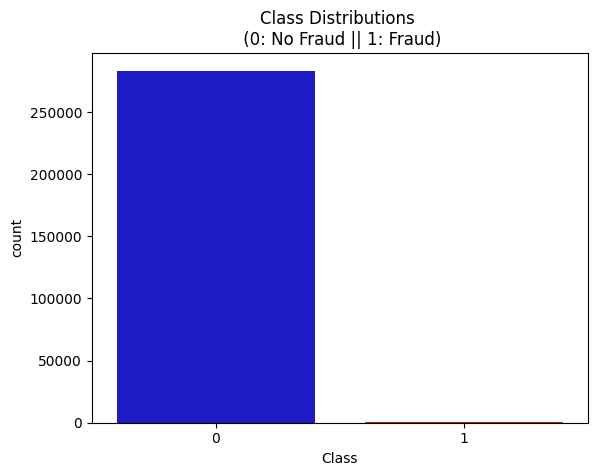

In [21]:
colors= ["#0101DF", "#DF0101"]
sns.countplot(x="Class", data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

<Figure size 800x600 with 0 Axes>

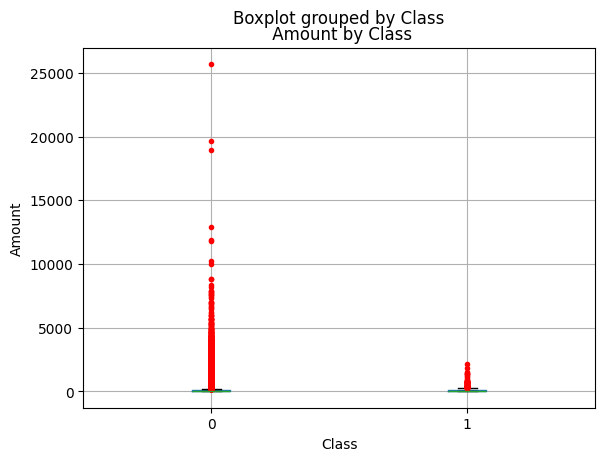

In [14]:

plt.figure(figsize = (8, 6))
df.boxplot(column = "Amount", by = "Class", sym = "r.")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title(" Amount by Class")
plt.show()

<Figure size 800x600 with 0 Axes>

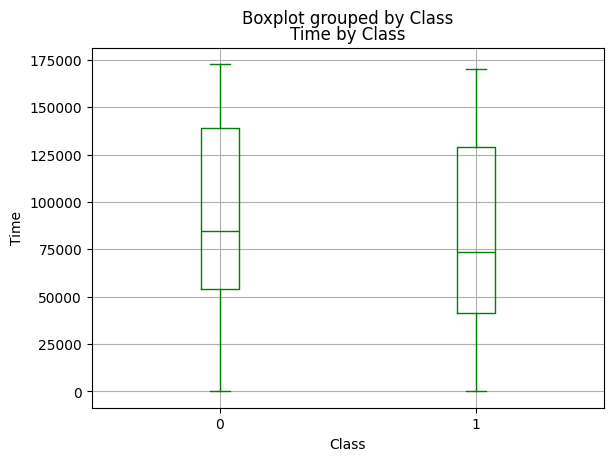

In [15]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Time", by = "Class", sym = "r.",color='green')
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Time by Class")
plt.show()

In [16]:
#Seperating the dependent and independent variable
x = df.drop(columns = 'Class', axis = 1)
y = df['Class']

In [25]:
#under sampling
from imblearn.under_sampling import NearMiss
model= NearMiss()
x_under_resampled, y_under_resampled = model.fit_resample(x, y)
x_under_resampled.shape, y_under_resampled.shape

((946, 30), (946,))

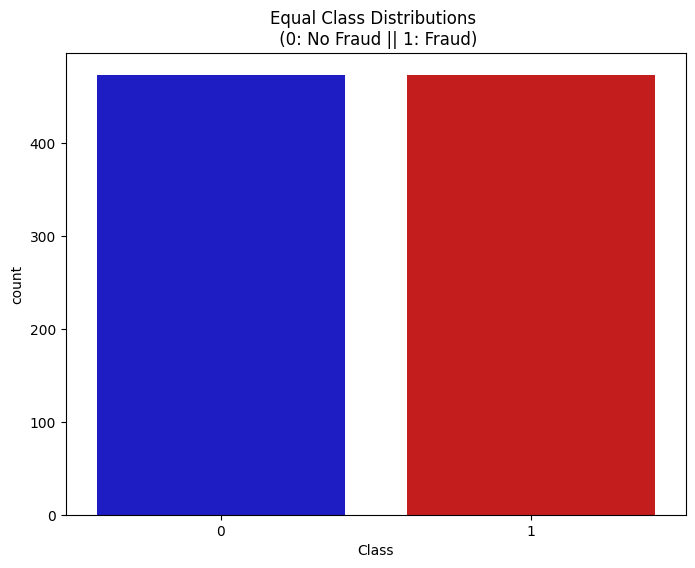

Class
0   0.50
1   0.50
Name: count, dtype: float64


In [26]:
plt.figure(figsize = (8, 6))
colors= ["#0101DF", "#DF0101"]
sns.countplot(x = y_under_resampled, palette = colors)
plt.title("Equal Class Distributions \n (0: No Fraud || 1: Fraud)")
plt.show()
print(y_under_resampled.value_counts()/len(y_under_resampled))

In [18]:
#over sampling
from imblearn.combine import SMOTETomek
model= SMOTETomek()
x_resampled, y_resampled = model.fit_resample(x, y)
x_resampled.shape, y_resampled.shape

((565378, 30), (565378,))

In [28]:
#Imbalance data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)

#under sampling
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(x_under_resampled, y_under_resampled, test_size=0.25)

#over sampling
x_train_over,x_test_over,y_train_over,y_test_over = train_test_split(x_resampled, y_resampled, test_size=0.25)
    

In [29]:
#understanding model 

#imbalance data
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models) #models_under

 97%|█████████▋| 28/29 [29:26<02:06, 126.66s/it] 

[LightGBM] [Info] Number of positive: 356, number of negative: 212438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 212794, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001673 -> initscore=-6.391475
[LightGBM] [Info] Start training from score -6.391475


100%|██████████| 29/29 [29:33<00:00, 61.16s/it] 


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.98               0.93     0.93      0.99   
XGBClassifier                      1.00               0.88     0.88      1.00   
GaussianNB                         0.98               0.88     0.88      0.99   
ExtraTreesClassifier               1.00               0.88     0.88      1.00   
RandomForestClassifier             1.00               0.88     0.88      1.00   
KNeighborsClassifier               1.00               0.88     0.88      1.00   
DecisionTreeClassifier             1.00               0.87     0.87      1.00   
BaggingClassifier                  1.00               0.87     0.87      1.00   
NearestCentroid                    1.00               0.87     0.87      1.00   
LinearDiscriminantAnalysis         1.00               0.86     0.86      1.00   
AdaBoostClassifier          

In [30]:
#under sampling
clf= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_under, predictions_under = clf.fit(x_train_under, x_test_under, y_train_under, y_test_under)
print(models_under)

 97%|█████████▋| 28/29 [00:04<00:00,  6.71it/s]

[LightGBM] [Info] Number of positive: 355, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7088
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500705 -> initscore=0.002821
[LightGBM] [Info] Start training from score 0.002821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:04<00:00,  6.37it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
BaggingClassifier                  0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.98               0.98     0.98      0.98   
DecisionTreeClassifier             0.98               0.98     0.98      0.98   
LGBMClassifier                     0.98               0.98     0.98      0.98   
CalibratedClassifierCV             0.98               0.98     0.98      0.98   
SGDClassifier                      0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
PassiveAggressiveClassifier        0.97               0.97     0.97      0.97   
QuadraticDiscriminantAnalysis      0.97               0.97     0.97      0.97   
LinearSVC                   

In [ ]:
#evaluation for under sampling
model_1= BaggingClassifier().fit(x_train_under,y_train_under)
y_pred_1= model_1.predict(x_test_under)
